Lab 9

22 October 2020

Create a linear regression model in python using any dataset of your choice. For this model you can also create your own data. Find the best fit line in the data and calculate SSE (sum of square error) or MSE (Mean square error) , Y intercept, and Slope for the relationship in data. Explain your findings and understanding of these terms in detail in the report. 




Import Libraries

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 

import statsmodels.api as sm 



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data for the Lab.

We are using a data set of SAT scores, High School GPA, and Future GPA.

Using the SAT scores to predict the Future GPA.

In [4]:
#Data is stored in GITHUB, url to the data
url = 'https://raw.githubusercontent.com/BillYerkes/CSC5542/master/Lab9/satgpa.csv'

#Read the data and show the top 20 rows
df = pd.read_csv(url,  error_bad_lines=False )
df.head(20)

,sex,sat_v,sat_m,sat_sum,hs_gpa,fy_gpa
0,1,65,62,127,3.40,3.18
1,2,58,64,122,4.00,3.33
2,2,56,60,116,3.75,3.25
3,1,42,53,95,3.75,2.42
4,1,55,52,107,4.00,2.63
5,2,55,56,111,4.00,2.91
6,1,57,65,122,2.80,2.83
7,1,53,62,115,3.80,2.51
8,2,67,77,144,4.00,3.82
9,1,41,44,85,2.60,2.54


The slope is:  0.02386573594038181
The Y intercept is 0.0019273710162877045


Text(0, 0.5, 'Future GPA is variable y (Dependent)')

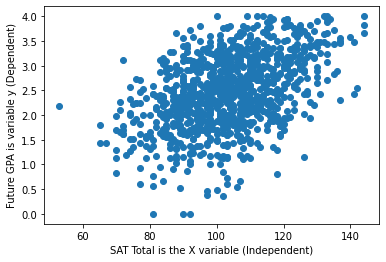

In [20]:



#Assign Total SAT score to X
#Assign Future GPA to y
x = np.array(df['sat_sum'] )
y = np.array(df['fy_gpa'])

#Number of data points
n = np.size(x) 

#Compute the x and y mean
x_mean = np.mean(x) 
y_mean = np.mean(y) 


Sxy = np.sum(x*y)- n*x_mean*y_mean 
Sxx = np.sum(x*x)-n*x_mean*x_mean 

#Calculate the Slope
slope = Sxy/Sxx 

#Calculate the Y intercept
y_intercept = y_mean-slope*x_mean 

print('The slope is: ', slope) 
print('The Y intercept is', y_intercept) 

#Plot the graph
plt.scatter(x,y) 
plt.xlabel('SAT Total is the X variable (Independent)') 
plt.ylabel('Future GPA is variable y (Dependent)') 




Draw the graph with the projection line superemposed.

Text(0, 0.5, 'y')

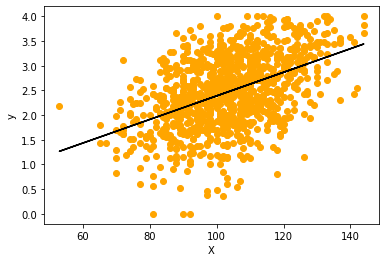

In [21]:
y_pred = slope * x + y_intercept 

plt.scatter(x, y, color = 'orange') 
plt.plot(x, y_pred, color = 'black') 
plt.xlabel('X') 
plt.ylabel('y') 


Compute the Mean square error

In [25]:
error = y - y_pred 
se = np.sum(error**2) 

print('The slope is: ', slope) 
print('The Y intercept is', y_intercept) 

mse = se/n 
print('mean squared error is', mse) 



The slope is:  0.02386573594038181
The Y intercept is 0.0019273710162877045
mean squared error is 0.43209338896546545


Use the Linear Regression object to compute the slope, y intercept, mean squered error, and sum of squere error

In [26]:
#Reshape the data to use the linear regression object
x = x.reshape(-1,1) 
regressionModel = LinearRegression() 

# Fit the data and train the model
regressionModel.fit(x, y) 

# Make prediction
y_predicted = regressionModel.predict(x) 

# Evaluate the Model
mse=mean_squared_error(y,y_predicted) 

# Print the Values
print('The slope is:' ,regressionModel.coef_[0]) 
print('The Y intercept is:', regressionModel.intercept_) 
print('mean squared error is:',mse) 

 


The slope is: 0.023865735940381817
The Y intercept is: 0.0019273710162872604
mean squared error is: 0.43209338896546545
